# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



In [3]:
# Inportando las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



In [4]:
# Cargando el dataset
df = pd.read_csv('titanic.csv')

In [5]:
# Mostrando los registros Null
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Mostrando los registros Null en porcentaje
df.isnull().sum() / len(df) * 100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
# Mostrando los registros duplicados
df.duplicated().sum()  

0

In [8]:
# Leyendo las columnas
df.head(5)
        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Remplazando Los Valores NaN de La columna Cabin por Sin_Datos_Cabina
df['Cabin'].fillna('Sin_Datos_Cabina', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11868\1845415137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Sin_Datos_Cabina', inplace=True)


In [10]:
# Remplazando Los Valores Nan de La columna Age por una predicción usando la regresión lineal

le = LabelEncoder()
df['Sex1'] = le.fit_transform(df['Sex'])

df_age_not_null = df[df['Age'].notnull()]
df_age_is_null = df[df['Age'].isnull()]

model = LinearRegression()
model.fit(df_age_not_null[['Fare', 'Sex1', 'Pclass']], df_age_not_null['Age'])

predicted_ages = model.predict(df_age_is_null[['Fare', 'Sex1', 'Pclass']])

df.loc[df['Age'].isnull(), 'Age'] = predicted_ages

In [11]:
# Remplazando Los Valores Nan de La columna Embarked por el valor más frecuente
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11868\1312984702.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
# Mostrando los registros Null para garantizar que las correcciones se han realizado
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Sex1           0
dtype: int64

In [13]:
# Obteniendo alguna información de las columnas

print(f'La edad mínima es {df["Age"].min()}')
print(f'La edad máxima es {df["Age"].max()}')
print(f'La edad promedio es {df["Age"].median().round(2)}')
print(f'El precio más alto pagado por un ticket es {df["Fare"].max()}')
print(f'El precio más bajo pagado por un ticket es {df["Fare"].min()}')
print(f'El total de personas a bordo es {(df["Embarked"].count())}')
print(f'El total de Hombres a bordo es {sum(df["Sex"] == "male")}')
print(f'El total de Mujeres a bordo es {sum(df["Sex"] == "female")}')

La edad mínima es 0.42
La edad máxima es 80.0
La edad promedio es 26.1
El precio más alto pagado por un ticket es 512.3292
El precio más bajo pagado por un ticket es 0.0
El total de personas a bordo es 891
El total de Hombres a bordo es 577
El total de Mujeres a bordo es 314


<Axes: xlabel='Pclass'>

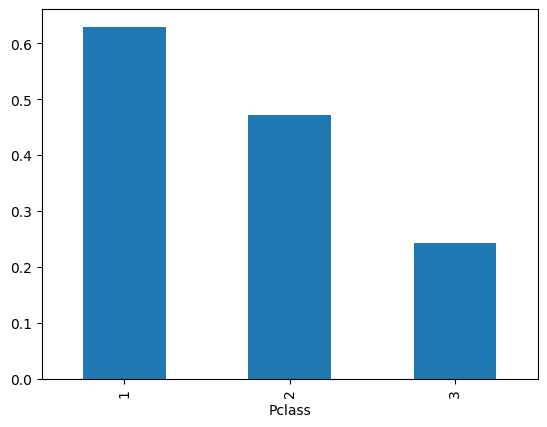

In [14]:
# La clase de pasajero mostró un efecto en las tasas de supervivencia:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<Axes: xlabel='Sex'>

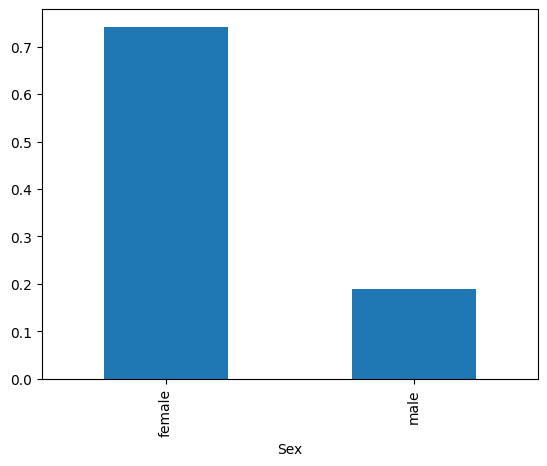

In [15]:
# El sexo del pasajero mostró un efecto en las tasas de supervivencia:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

Sobrevivientes     : 342
No Sobrevivientes  : 549


Text(0, 0.5, '')

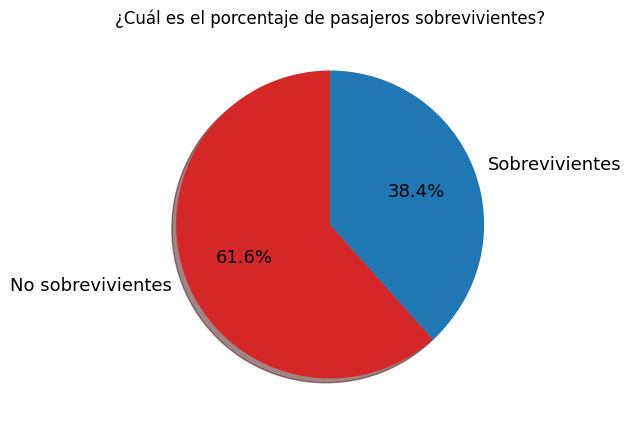

In [16]:
# Crea un mapa indicando los Sobrevivientes y No Sobrevivientes
df['Not_Survived'] = df['Survived'].map({0:1, 1:0})

# Cuenta los valores encontrados de sobrevivientes y no sobrevivientes y muestra en la pantalla
print('Sobrevivientes     :', df['Survived'].value_counts()[1])
print('No Sobrevivientes  :', df['Survived'].value_counts()[0])

# Genera el gráfico
df['Survived'].value_counts().plot.pie(
    colors=('tab:red', 'tab:blue'),
    title='¿Cuál es el porcentaje de pasajeros sobrevivientes?',
    fontsize=13,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%',
    labels=('No sobrevivientes', 'Sobrevivientes'),
    figsize=(5,5)
).set_ylabel('')

Text(0, 0.5, 'Frecuencia')

<Figure size 640x480 with 0 Axes>

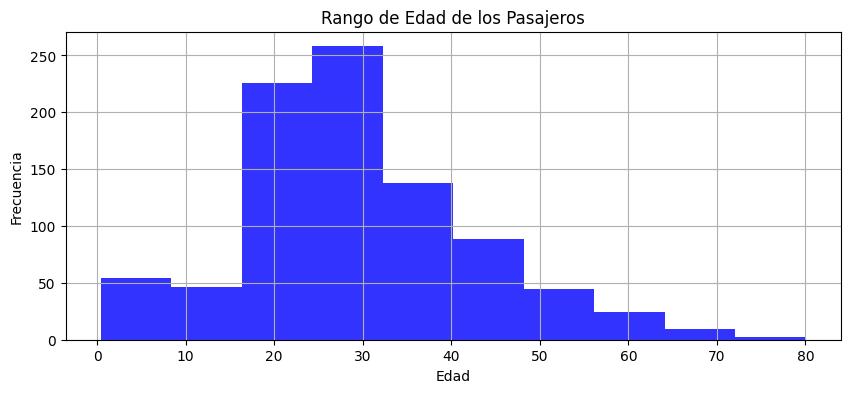

In [17]:
# Rango de edades

plt.figure()
df.hist(column='Age', color='blue', alpha=0.8, bins=10, figsize=(10, 4))
plt.title('Rango de Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

C:\Users\User\AppData\Local\Temp\ipykernel_11868\3622471398.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Niños' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[df['Age'] < 18].index, 'Ninos_adultos'] = 'Niños'


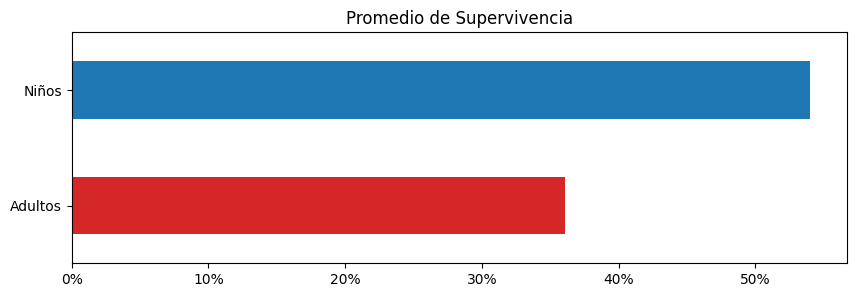

In [18]:
# Divide los datos en grupos de niños y adultos
df['Ninos_adultos'] = 0
df.loc[df[df['Age'] < 18].index, 'Ninos_adultos'] = 'Niños'
df.loc[df[df['Age'] >= 18].index, 'Ninos_adultos'] = 'Adultos'

# Función para formatear el eje x en porcentaje
formatter = FuncFormatter(lambda x, _: f'{x:.0%}')

# Genera gráfico de supervivencia de niños y adultos en porcentaje
df.groupby('Ninos_adultos')['Survived'].mean().plot.barh(
    title='Promedio de Supervivencia', 
    figsize=(10, 3),
    color=('tab:Red', 'tab:blue')
).set_ylabel('')

# Aplicar el formato de porcentaje al eje x
plt.gca().xaxis.set_major_formatter(formatter)

# Establecer la etiqueta del eje x
plt.xlabel('')

# Mostrar el gráfico
plt.show()


In [19]:
# Crear una nueva columna llamada Title que contenga el título de cada pasajero
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
print(df[['Name', 'Title']].head())


                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [20]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

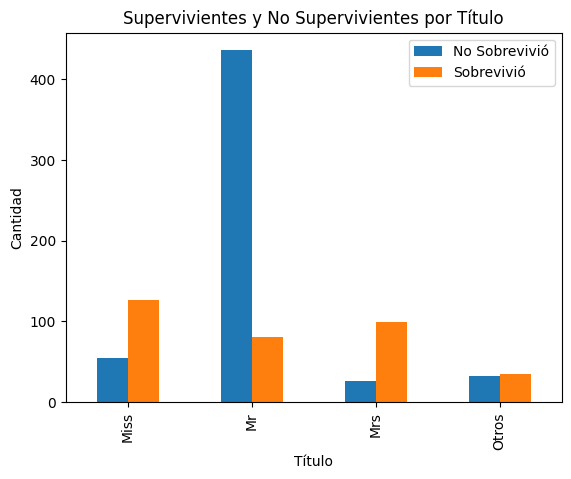

In [26]:
# Crear un gráfico de barras que muestre la cantidad de pasajeros Muertos y que sobreviviron por título

# Función para agrupar los títulos
def agrupar_titulos(titulo):
    if titulo in ['Mr', 'Miss', 'Mrs']:
        return titulo
    else:
        return 'Otros'

# Aplicando la función para agrupar los títulos
df['Grupo_Titulo'] = df['Title'].apply(agrupar_titulos)

# Agrupando los datos por título y supervivencia
agrupado = df.groupby(['Grupo_Titulo', 'Survived']).size().unstack(fill_value=0)

# Generando el gráfico
agrupado.plot(kind='bar')
plt.title('Supervivientes y No Supervivientes por Título')
plt.xlabel('Título')
plt.ylabel('Cantidad')
plt.legend(['No Sobrevivió', 'Sobrevivió'])
plt.show()
